In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

Attention : dans les données de prévisions 2023 il manque 5 valeurs au 31 décembre 2023 il manque les valeurs de 7h à midi. Ainsi on retire les même valeurs des relevés pour pouvoir faire de bonnes comparaisons.

bonjour test

In [2]:
past_forecast = pd.read_csv('hourly_past_predicted_temperature_2m_2023.csv')
historical_data = pd.read_csv('hourly_past_real_temperature_2m_2023.csv')
historical_data = historical_data.rename(columns={historical_data.columns[0]: 'compteur'})
past_forecast = past_forecast.rename(columns={past_forecast.columns[0]: 'compteur'})
print(len(historical_data))
print(len(past_forecast))

245280
245140


In [ ]:
for j in range(0,27):
        print(historical_data["date"].iloc[j*8760+8743])
        print(past_forecast["date"].iloc[j*8755+8743-1])
        print(past_forecast["date"].iloc[j*8755+8743])
        print("")
        

In [ ]:
past_forecast_provisoire = past_forecast[~(past_forecast["compteur"].isin([8743,8744,8745,8746,8747]))]
print(len(past_forecast_provisoire))


In [ ]:
for j in range(0,27):
        print(historical_data["date"].iloc[j*8760+8743-1])
        print(historical_data["date"].iloc[j*8760+8743])
        print(past_forecast_provisoire["date"].iloc[j*8755+8743-1])
        print(past_forecast_provisoire["date"].iloc[j*8755+8743])
        print("")

In [6]:
past_forecast_provisoire["real_temperature_2m"]=historical_data["real_temperature_2m"]
past_forecast_provisoire["error"]=past_forecast_provisoire["temperature_2m"]-past_forecast_provisoire["real_temperature_2m"]
past_forecast_provisoire["absolute_error"]=abs(past_forecast_provisoire["error"])

In [7]:
past_forecast_provisoire['date'] = pd.to_datetime(past_forecast_provisoire['date'])

In [8]:
past_forecast_provisoire.describe()

,compteur,temperature_2m,latitude,longitude,real_temperature_2m,error,absolute_error
count,245140.000000,245140.000000,245140.000000,245140.000000,245140.000000,245140.000000,245140.000000
mean,4377.006853,12.906437,46.000000,1.000000,12.914757,-0.008321,3.284721
std,2527.367802,7.444778,2.236073,4.000008,7.331233,4.587575,3.202572
min,0.000000,-21.815500,43.000000,-5.000000,-26.635500,-23.978000,0.000000
25%,2188.000000,8.400000,44.500000,-3.000000,8.475500,-2.250000,0.900000
50%,4377.000000,12.981500,46.000000,1.000000,13.049500,0.034499,2.200000
75%,6566.000000,18.041500,47.500000,5.000000,18.035501,2.150000,4.723500
max,8759.000000,41.349503,49.000000,7.000000,41.149500,23.398000,23.978000


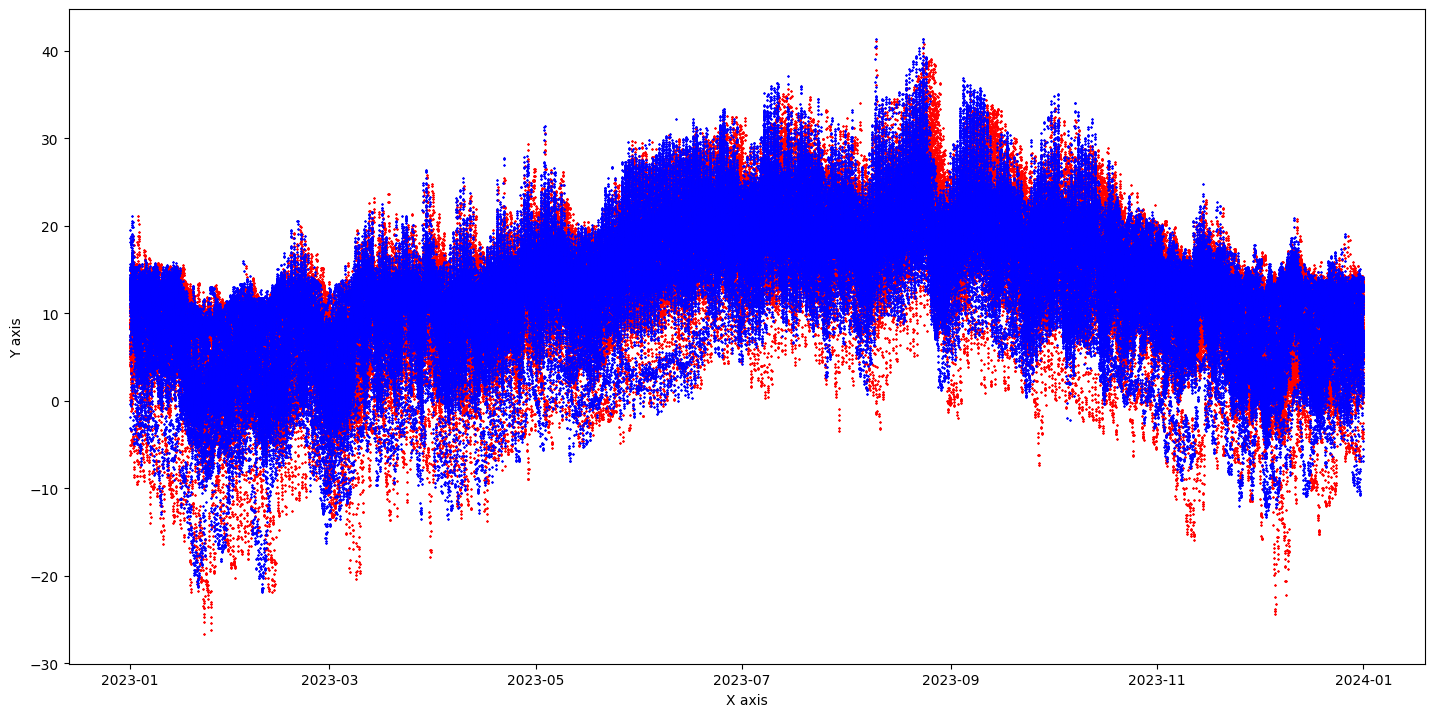

In [10]:
x = past_forecast_provisoire["date"]
y1 = past_forecast_provisoire["real_temperature_2m"]
y2 = past_forecast_provisoire["temperature_2m"]

fig = plt.figure(figsize=(17.5,8.5))

# Scatter plot the points
plt.scatter(x, y1, c='r', marker='X', s=0.5) # température réelle 
plt.scatter(x, y2, c='b', marker='X', s=0.5)  # température prédite par le modèle 

# Set labels
plt.xlabel('X axis')
plt.ylabel('Y axis')


plt.show()

In [11]:
janvier = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 1]
fevrier = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 2]
mars = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 3]
avril = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 4]

mai = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 5]
juin = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 6]
juillet = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 7]
aout = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 8]

septembre = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 9]
octobre = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 10]
novembre = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 11]
decembre = past_forecast_provisoire[past_forecast_provisoire["date"].dt.month == 12]

janvier.describe()

,compteur,temperature_2m,latitude,longitude,real_temperature_2m,error,absolute_error
count,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000
mean,371.500000,5.814053,46.000000,1.000000,6.188921,-0.374869,2.652415
std,214.779261,5.968183,2.236122,4.000096,6.010715,3.631704,2.508817
min,0.000000,-21.315500,43.000000,-5.000000,-26.635500,-16.482499,0.000000
25%,185.750000,1.537000,44.500000,-3.000000,2.467000,-2.300000,0.850000
50%,371.500000,6.750000,46.000000,1.000000,7.391000,-0.250000,1.921250
75%,557.250000,10.500000,47.500000,5.000000,10.669499,1.587000,3.676625
max,743.000000,21.149500,49.000000,7.000000,21.082499,22.335500,22.335500


In [12]:
important_error=past_forecast_provisoire[past_forecast_provisoire["absolute_error"]>=10]
print(len(important_error))

print(len(important_error)/len(past_forecast_provisoire)*100)

11856
4.836420004895162


In [13]:
print(important_error)

        compteur                      date  temperature_2m  latitude  \
8755           0 2023-01-01 00:00:00+00:00         19.4995        43   
8756           1 2023-01-01 01:00:00+00:00         18.5995        43   
8757           2 2023-01-01 02:00:00+00:00         18.0995        43   
8758           3 2023-01-01 03:00:00+00:00         17.7995        43   
8759           4 2023-01-01 04:00:00+00:00         17.8995        43   
...          ...                       ...             ...       ...   
244920      8535 2023-12-22 15:00:00+00:00          9.3655        49   
244973      8588 2023-12-24 20:00:00+00:00          9.6655        49   
244974      8589 2023-12-24 21:00:00+00:00          9.6655        49   
244975      8590 2023-12-24 22:00:00+00:00          9.6155        49   
244976      8591 2023-12-24 23:00:00+00:00          9.5155        49   

        longitude  real_temperature_2m      error  absolute_error  
8755           -3               0.7355  18.764000       18.764000  

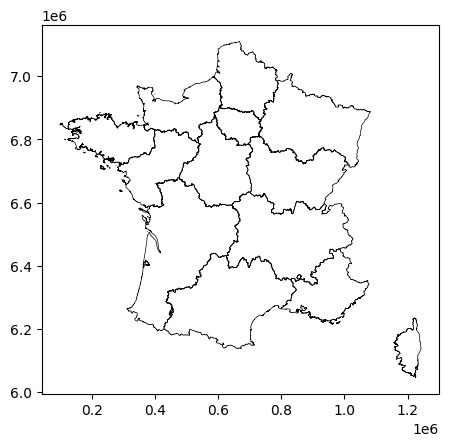

In [14]:
from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)
france = france.loc[france["INSEE_REG"] > 10]
france_2154 = france.to_crs(2154)
ax1 = france_2154.boundary.plot(edgecolor="k", linewidth=0.5)

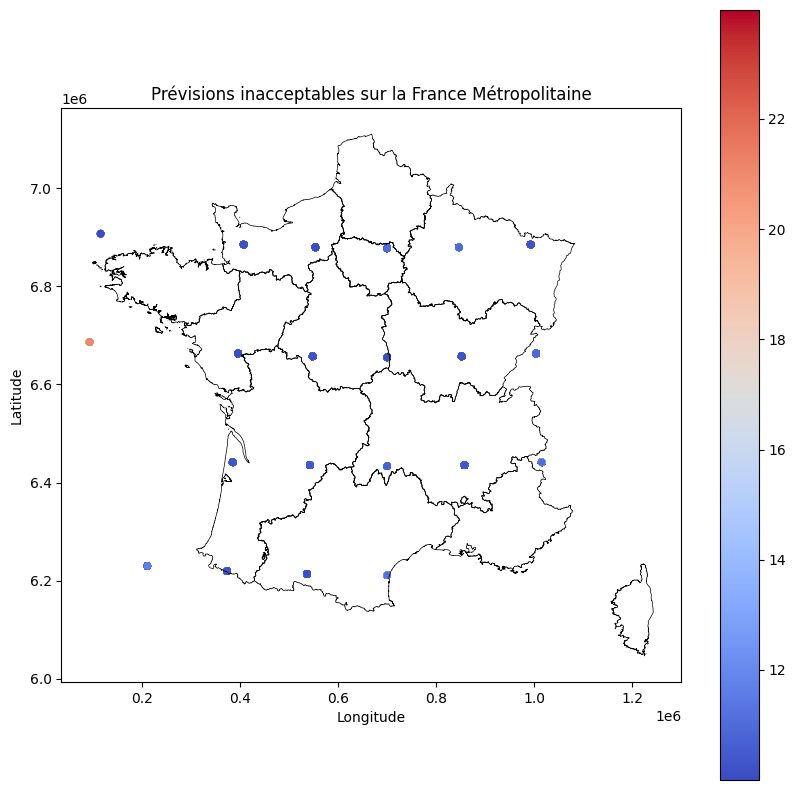

In [15]:
# Convertir le DataFrame pandas en GeoDataFrame avec la projection EPSG:4326
geometry = [Point(xy) for xy in zip(important_error["longitude"], important_error["latitude"])]
geo_result = gpd.GeoDataFrame(important_error, geometry=geometry, crs="EPSG:4326")

# Reprojections de vos points en Lambert-93 (pour correspondre à france_2154)
geo_result_2154 = geo_result.to_crs(2154)

# Afficher la carte avec la France et les températures sur celle-ci
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher les frontières de la France métropolitaine
france_2154.boundary.plot(ax=ax, edgecolor="k", linewidth=0.5)

# Afficher les points de température sur la carte
# Utiliser une couleur pour représenter la température
geo_result_2154.plot(ax=ax, column="absolute_error", cmap="coolwarm", markersize=20, legend=True)

# Afficher la carte avec les légendes
plt.title("Prévisions inacceptables sur la France Métropolitaine")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

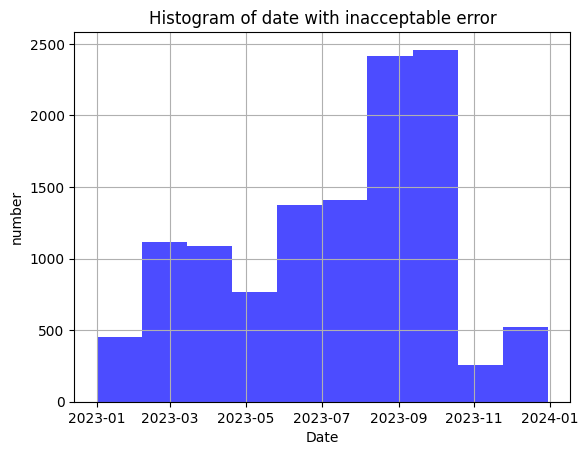

In [16]:
# Create the histogram
plt.hist(important_error["date"], alpha=0.7, color='b')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('number')
plt.title('Histogram of date with inacceptable error')
plt.grid(True)

# Show the plot
plt.show()